In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("zaraavagyan/weathercsv")

print("Path to dataset files:", path)

# List files in the downloaded directory to find the CSV file
files = os.listdir(path)
csv_file = None
for file in files:
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file:
    # Load the weather dataset
    df = pd.read_csv(csv_file)

    # Select relevant features (e.g., temperature)
    features = ['Temp3pm']
    df_features = df[features]

    # Handle missing values (e.g., forward fill)
    df_features.fillna(method='ffill', inplace=True)

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df_features)

    # Create sequences
    sequence_length = 10 # Number of past time steps
    prediction_horizon = 1 # Number of future time steps

    X, y = [], []
    for i in range(len(scaled_data) - sequence_length - prediction_horizon + 1):
        X.append(scaled_data[i : i + sequence_length])
        y.append(scaled_data[i + sequence_length : i + sequence_length + prediction_horizon])

    X = np.array(X)
    y = np.array(y)

    # Split into training and testing sets (e.g., 80% train, 20% test)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    print("Shape of X_train:", X_train.shape)
    print("Shape of y_train:", y_train.shape)
    print("Shape of X_test:", X_test.shape)
    print("Shape of y_test:", y_test.shape)
else:
    print("No CSV file found in the downloaded dataset.")

Using Colab cache for faster access to the 'weathercsv' dataset.
Path to dataset files: /kaggle/input/weathercsv
Shape of X_train: (284, 10, 1)
Shape of y_train: (284, 1, 1)
Shape of X_test: (72, 10, 1)
Shape of y_test: (72, 1, 1)


/tmp/ipython-input-511646014.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features.fillna(method='ffill', inplace=True)
/tmp/ipython-input-511646014.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features.fillna(method='ffill', inplace=True)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=prediction_horizon))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Compile the model (if not already compiled)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 0.2689 - val_loss: 0.0063
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0491 - val_loss: 0.0386
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0394 - val_loss: 0.0121
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0355 - val_loss: 0.0121
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0323 - val_loss: 0.0245
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0341 - val_loss: 0.0175
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0247 - val_loss: 0.0157
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0279 - val_loss: 0.0190
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0305 - val_loss: 0.0154
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0247 - val_loss: 0.0211


In [6]:
# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")

Test Loss: 0.01827123388648033


In [7]:

last_sequence = scaled_data[-sequence_length:]
last_sequence = last_sequence.reshape(1, sequence_length, 1) # Reshape for prediction

predicted_future_temperatures = []

# Use the best model for prediction (assuming best_model is the hyperparameter tuned model)
# If you have run other experiments after hyperparameter tuning,
# you might need to explicitly select the best model here.
best_model = model # Assuming the 'model' variable holds the best tuned model

for _ in range(20):
    # Predict the next time step
    next_prediction_scaled = best_model.predict(last_sequence)

    # Append the prediction to the sequence
    last_sequence = np.append(last_sequence[:, 1:, :], next_prediction_scaled.reshape(1, 1, 1), axis=1)

    # Store the prediction
    predicted_future_temperatures.append(next_prediction_scaled[0][0])

# Inverse transform the scaled predictions
predicted_future_temperatures = scaler.inverse_transform(np.array(predicted_future_temperatures).reshape(-1, 1))

# Print the predicted future temperatures
print("Predicted Temperatures for the Next 20 Days:")
for i, temp in enumerate(predicted_future_temperatures):
    print(f"Day {i+1}: {temp[0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Temperatures for the Next 20 Days:
Day 1: 24.11
Day 2: 24.88
Day 3: 25.42
Day 4: 25.75
Day 5: 25.75
Day 6: 25.72
Day 7: 25.50
Day 8: 25.41
Day 9: 25.81
Day 10: 25.79
Day 11: 25.65
Day 12: 25.75
Day 13: 25.80
Day 14: 25.82
Day 15:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


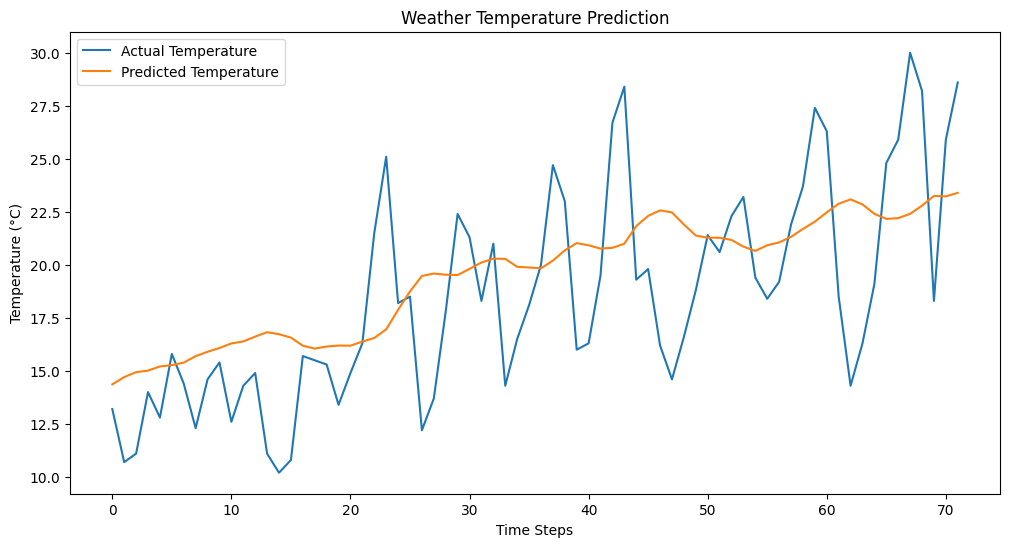

In [9]:
import matplotlib.pyplot as plt

# Use the trained model, test data, and scaler directly
best_model = model
X_test_best = X_test
y_test_best = y_test
scaler_best = scaler

# Make predictions on the test data using the best model
predictions_best = best_model.predict(X_test_best)

# Inverse transform the scaled predictions and actual values
# Need to handle the case where y_test might have more than one feature in the original scaled data
if y_test_best.shape[-1] > 1:
    # If the original scaled data had multiple features, we need to create a dummy array
    # with the predicted values in the correct column (Temp3pm is the last column in expanded_features)
    dummy_predictions = np.zeros((predictions_best.shape[0], scaler_best.n_features_in_))
    dummy_predictions[:, -1] = predictions_best[:, 0] # Place Temp3pm predictions in the last column
    predicted_temperatures_best = scaler_best.inverse_transform(dummy_predictions)[:, -1]

    dummy_actual = np.zeros((y_test_best.shape[0], scaler_best.n_features_in_))
    dummy_actual[:, -1] = y_test_best[:, 0, 0] # Place actual Temp3pm values in the last column
    actual_temperatures_best = scaler_best.inverse_transform(dummy_actual)[:, -1]
else:
    # If the original scaled data had only one feature, inverse transform directly
    predicted_temperatures_best = scaler_best.inverse_transform(predictions_best)
    actual_temperatures_best = scaler_best.inverse_transform(y_test_best.reshape(-1, 1))


# Plot the actual and predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(actual_temperatures_best, label='Actual Temperature')
plt.plot(predicted_temperatures_best, label='Predicted Temperature')
plt.title('Weather Temperature Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()